Import Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 

Import data and drop duplicate rows and fill nan cells with mean value of each column

In [3]:
meta=pd.read_csv('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\Data\\final data set.csv',index_col=0)
meta.drop_duplicates(subset=['Mojo ID'],inplace=True)
meta=meta.fillna(meta.mean())

number of countries present in our data set 

In [4]:
counter=0
for item in meta.columns:
    if item.split(' ')[0]=='country':
        counter+=1
print(counter)

146


# hist plot of log worldwide gross 

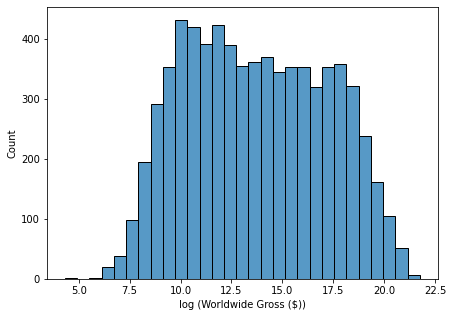

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig=plt.figure(figsize=(7,5))
sns.histplot(np.log1p(meta['Worldwide Gross ($)']))
plt.xlabel('log (Worldwide Gross ($))')
plt.ylabel('Count')
#fig.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\linear.pdf',bbox_inches='tight')
plt.show()

# language plot

In [6]:
lan=[]
for item in meta.columns:
    if item.split(' ')[0]=='language':
        strings=item.split(' ')[1:]
        lan.append(' '.join(strings))

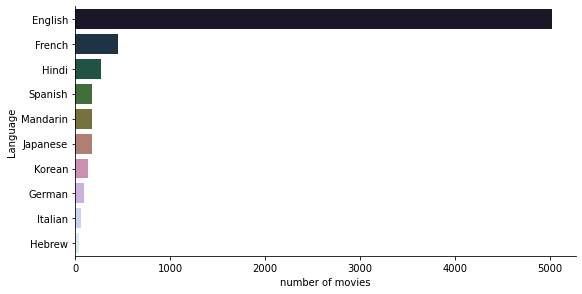

In [35]:
n={}
for item in lan:
    n[item]=[0,[]]

for index in meta.index:
    for item in lan:
        if meta.loc[index,"language "+item]==1 and meta.loc[index,'IMDB ID'] not in n[item][1]:
            n[item][0]+=1
            n[item].append(meta.loc[index,'IMDB ID'])
for item in n:
    n[item]=n[item][0]
n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:10],y=list(n.keys())[:10],data=meta,kind='bar',palette='cubehelix',height=4,aspect=2)
plt.xlabel('number of movies')
plt.ylabel('Language')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\lan hist.pdf',bbox_inches='tight')


# Directors Plots

<ipython-input-63-da9156bcb470>:18: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  matplotlib.cm.register_cmap("mycolormap", cmap)


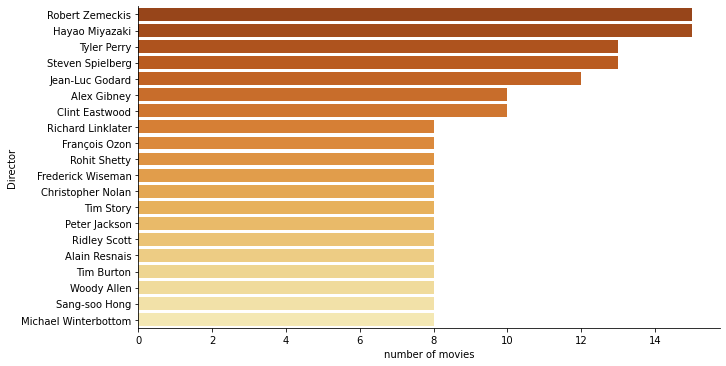

In [63]:
d=meta['Director(s)']
d_set=[]
n={}
for item in d:
    if type(item)==str:
        for di in item.split('\n'):
            d_set.append(di.strip())
d_set=list(set(d_set))
for item in d_set:
    n[item]=0
for index in meta.index:
    if type(meta.loc[index,'Director(s)'])==str:
        for di in meta.loc[index,'Director(s)'].split('\n'):
            n[di.strip()]+=1
n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",sns.color_palette("YlOrBr_r"))
matplotlib.cm.register_cmap("mycolormap", cmap)
sns.catplot(x=list(n.values())[:20],y=list(n.keys())[:20],data=meta,kind='bar',palette='mycolormap',height=5,aspect=2)
plt.xlabel('number of movies')
plt.ylabel('Director')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\director bar.pdf',bbox_inches='tight')
plt.show()


In [44]:
len(d_set)

5836

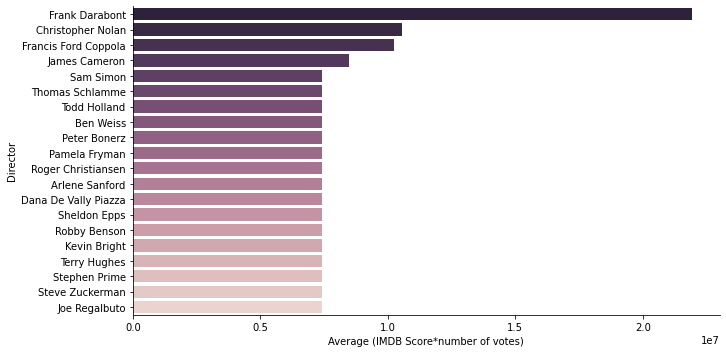

In [64]:
show=20
n={}
for item in d_set:
    if type(item)==str:
        n[item]=[0,0,[]]
for index in meta.index:
    if type(meta.loc[index,'Director(s)'])==str:
        for di in meta.loc[index,'Director(s)'].split('\n'):
            if meta.loc[index,'IMDB score'] not in n[di.strip()][2]:
                n[di.strip()][0]+=(meta.loc[index,'IMDB score']*meta.loc[index,'IMDB votes'])
                n[di.strip()][2].append(meta.loc[index,'IMDB ID'])
                n[di.strip()][1]+=1
for item in n:
    n[item]=n[item][0]/n[item][1]
n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:show],y=list(n.keys())[:show],data=meta,kind='bar',palette="ch:3_r",height=5,aspect=2)
plt.xlabel('Average (IMDB Score*number of votes)')
plt.ylabel('Director')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\director score.pdf',bbox_inches='tight')

In [10]:
mm=[]
for index in meta.index:
    if meta.loc[index,'Director(s)']=='Jean-Luc Godard':
        mm.append(meta.loc[index,'title'])

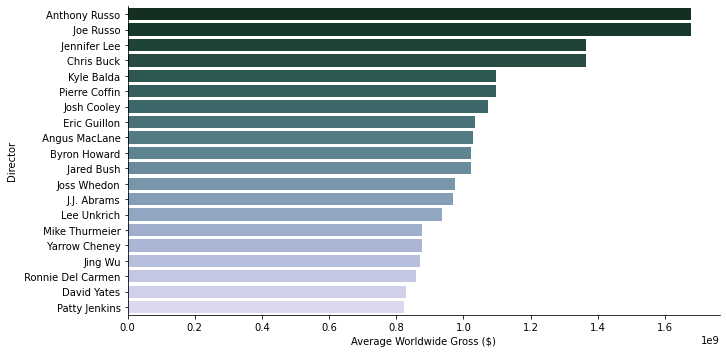

In [38]:
d=meta['Director(s)']
d_set=[]
n={}
for item in d:
    if type(item)==str:
        for di in item.split('\n'):
            d_set.append(di)
d_set=list(set(d_set))
for item in d_set:
    n[item]=[0,0]
for index in meta.index:
    if type(meta.loc[index,'Director(s)'])==str:
        for di in meta.loc[index,'Director(s)'].split('\n'):
            n[di][0]+=meta.loc[index,'Worldwide Gross ($)']
            n[di][1]+=1

for item in n:
    n[item]=n[item][0]/n[item][1]
n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:20],y=list(n.keys())[:20],data=meta,kind='bar',palette="ch:5_r",height=5,aspect=2)
plt.xlabel('Average Worldwide Gross ($)')
plt.ylabel('Director')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\director average bar.pdf',bbox_inches='tight')

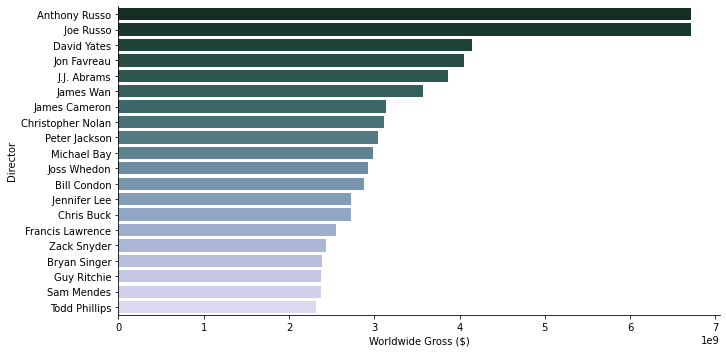

In [39]:
d=meta['Director(s)']
d_set=[]
n={}
for item in d:
    if type(item)==str:
        for di in item.split('\n'):
            d_set.append(di)
d_set=list(set(d_set))
for item in d_set:
    n[item]=[0,0]
for index in meta.index:
    if type(meta.loc[index,'Director(s)'])==str:
        for di in meta.loc[index,'Director(s)'].split('\n'):
            n[di][0]+=meta.loc[index,'Worldwide Gross ($)']
            n[di][1]+=1

for item in n:
    n[item]=n[item][0]
n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:20],y=list(n.keys())[:20],data=meta,kind='bar',palette="ch:5_r",height=5,aspect=2)
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Director')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\director no average bar.pdf',bbox_inches='tight')

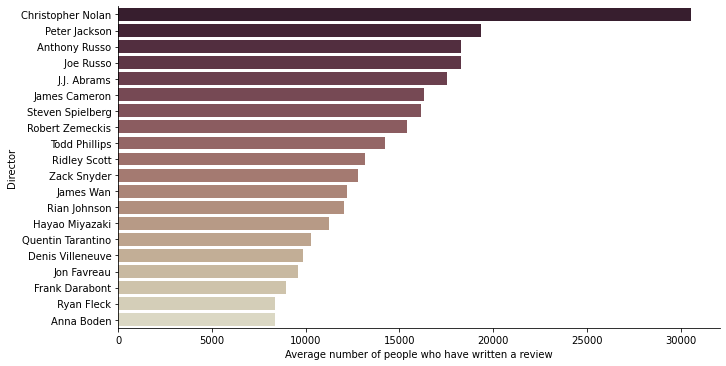

In [54]:
d=meta['Director(s)']
d_set=[]
n={}
for item in d:
    if type(item)==str:
        for di in item.split('\n'):
            d_set.append(di)
d_set=list(set(d_set))
for item in d_set:
    n[item]=[0,0]
for index in meta.index:
    if type(meta.loc[index,'Director(s)'])==str:
        for di in meta.loc[index,'Director(s)'].split('\n'):
            n[di][0]+=(meta.loc[index,'User']+meta.loc[index,'Critic'])
            n[di][1]+=1

for item in n:
    n[item]=n[item][0]
n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:20],y=list(n.keys())[:20],data=meta,kind='bar',palette="ch:0.4_r",height=5,aspect=2)
plt.xlabel('Average number of people who have written a review')
plt.ylabel('Director')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\director avg review.pdf',bbox_inches='tight')

# Distributor Plots

In [66]:
len(set(meta['Distributor']))


375

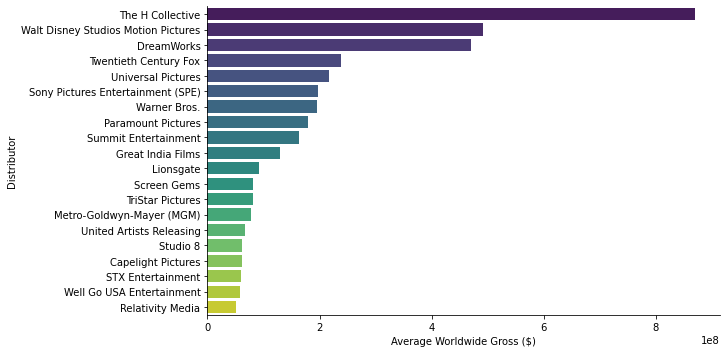

In [67]:
show=20
dist=set(meta['Distributor'])
n={}
for item in dist:
    if type(item)==str:
        n[item]=[0,0]
for index in meta.index:
    if type(meta.loc[index,'Distributor'])==str:
        n[meta.loc[index,'Distributor']][0]+=meta.loc[index,'Worldwide Gross ($)']
        n[meta.loc[index,'Distributor']][1]+=1
for item in n:
    n[item]=n[item][0]/n[item][1]
n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:show],y=list(n.keys())[:show],data=meta,kind='bar',palette="viridis",height=5,aspect=2)
plt.xlabel('Average Worldwide Gross ($)')
plt.ylabel('Distributor')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\avg wg dis.pdf',bbox_inches='tight')

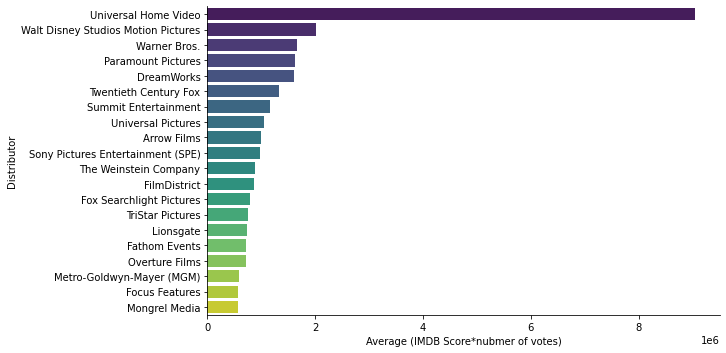

In [68]:
new_dict={}
for item in n:
    new_dict[item]=[0,0,[]]
for counter,item in enumerate(n):
    for index in meta.index:
        if meta.loc[index,'Distributor']==item and meta.loc[index,'IMDB ID'] not in new_dict[item][2]:
            new_dict[item][0]+=(meta.loc[index,'IMDB score']*meta.loc[index,'IMDB votes'])
            new_dict[item][1]+=1
            new_dict[item].append(meta.loc[index,'IMDB ID'])
for item in new_dict:
    new_dict[item]=new_dict[item][0]/new_dict[item][1]

new_dict=dict(sorted(new_dict.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(new_dict.values())[:show],y=list(new_dict.keys())[:show],data=meta,kind='bar',palette="viridis",height=5,aspect=2)
plt.xlabel('Average (IMDB Score*nubmer of votes)')
plt.ylabel('Distributor')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\avg IMDB score dis.pdf',bbox_inches='tight')


In [17]:

mm=[]
for index in meta.index:
    if meta.loc[index,'Distributor']=='Great India Films':
        mm.append(meta.loc[index,'title'])


In [18]:
mm

['Baahubali 2: The Conclusion', 'Bharath Ane Nenu']

# Actors Plots

In [48]:
actors=[]
for index in meta.index:
    if type(meta.loc[index,'Stars'])==str:
        for item in meta.loc[index,'Stars'].split('\n'):
            actors.append(item.strip())

actors=set(actors)

In [49]:
len(actors)

20474

In [50]:
n={}
for item in actors:
    n[item]=[0,0,[]]

for index in meta.index:
    if type(meta.loc[index,'Stars'])==str:
        for item in meta.loc[index,'Stars'].split('\n'):
            if meta.loc[index,'IMDB ID'] not in n[item.strip()][2]:
                n[item.strip()][0]+=meta.loc[index,'IMDB score']
                n[item.strip()][1]+=1
                n[item.strip()][2].append(meta.loc[index,'IMDB ID'])

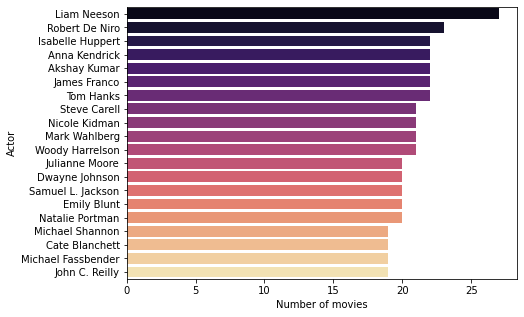

In [51]:
n1={}
for item in n:
    n1[item]=n[item][1]
n1=dict(sorted(n1.items(), key=lambda item: item[1],reverse=1))
fig=plt.figure(figsize=(7,5))
sns.barplot(x=list(n1.values())[:show],y=list(n1.keys())[:show],data=meta,palette="magma")
plt.xlabel('Number of movies')
plt.ylabel('Actor')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\actors bar movie num.pdf',bbox_inches='tight')

In [22]:
for index in meta.index:
    if type(meta.loc[index,'Stars'])==str:
        for item in meta.loc[index,'Stars'].split('\n'):
            if item=='Robert De Niro':
                print(meta.loc[index,'title'])

Little Fockers
Machete
Stone
Limitless
Killer Elite
Silver Linings Playbook
Being Flynn
Red Lights
Last Vegas
The Family
The Big Wedding
Grudge Match
Killing Season
The Bag Man
The Intern
Joy
Heist
Dirty Grandpa
Hands of Stone
The Comedian
Great Performances at the Met: Puccini: La Bohème
Joker
The Godfather: Part II


# Movies Plots

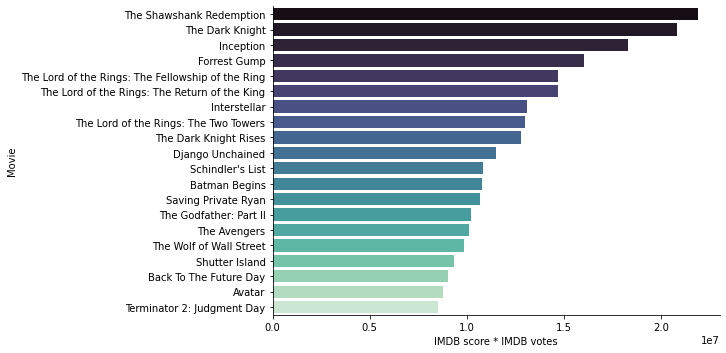

In [53]:
n={}
for index in meta.index:
    if type(meta.loc[index,'title'])==str:
        n[meta.loc[index,'title'].strip()]=(meta.loc[index,'IMDB score']*meta.loc[index,'IMDB votes'])


n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:show],y=list(n.keys())[:show],data=meta,kind='bar',palette="mako",height=5,aspect=2)
plt.xlabel('IMDB score * IMDB votes')
plt.ylabel('Movie')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\movie IMDB score.pdf',bbox_inches='tight')

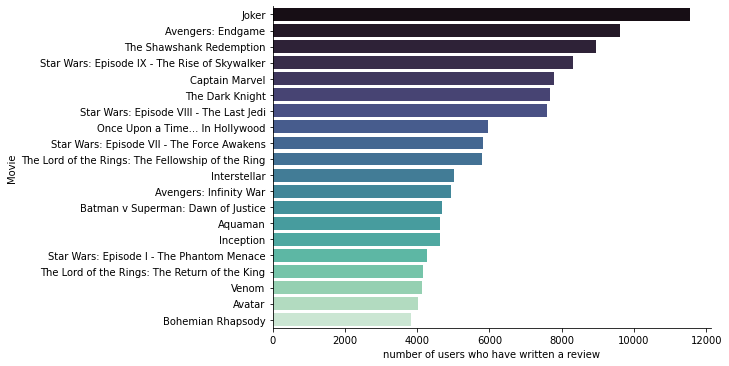

In [56]:
n={}
for index in meta.index:
    if type(meta.loc[index,'title'])==str:
        n[meta.loc[index,'title'].strip()]=(meta.loc[index,'User']+meta.loc[index,'Critic'])

n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:show],y=list(n.keys())[:show],data=meta,kind='bar',palette="mako",height=5,aspect=2)
plt.xlabel('number of users who have written a review')
plt.ylabel('Movie')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\movie review.pdf',bbox_inches='tight')

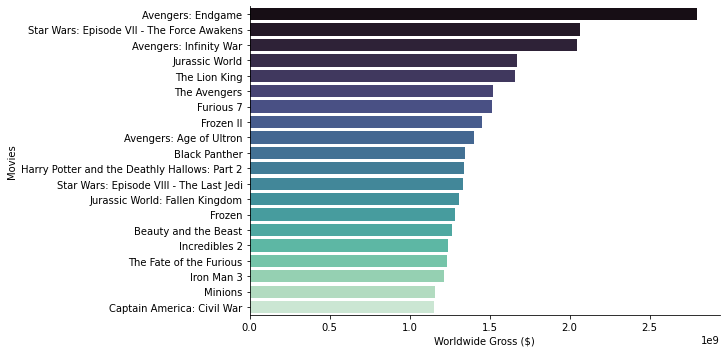

In [80]:
n={}
for index in meta.index:
    if type(meta.loc[index,'title'])==str:
        n[meta.loc[index,'title'].strip()]=meta.loc[index,'Worldwide Gross ($)']

n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:show],y=list(n.keys())[:show],data=meta,kind='bar',palette="mako",height=5,aspect=2)
plt.xlabel('Worldwide Gross ($)')
plt.ylabel('Movies')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\movie gross.pdf',bbox_inches='tight')

# Genre Plot 

In [57]:
genres=[]
for item in meta.columns:
    if item.split(' ')[0]=='genre':
        genres.append(item.split(' ')[1:])
genres=[x for sublist in genres for x in sublist]

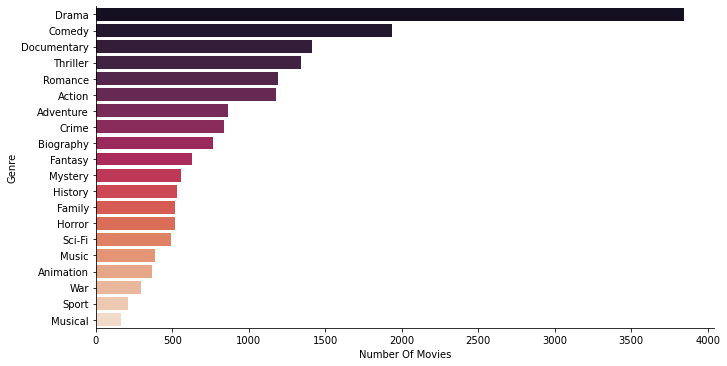

In [59]:
n={}
for genre in genres:
    n[genre]=meta['genre '+genre].sum()
n=dict(sorted(n.items(), key=lambda item: item[1],reverse=1))
sns.catplot(x=list(n.values())[:show],y=list(n.keys())[:show],data=meta,kind='bar',palette="rocket",height=5,aspect=2)
plt.xlabel('Number Of Movies')
plt.ylabel('Genre')
plt.savefig('C:\\Users\\alise\\Dropbox\\Programming\\Machine learning in physics- 2021\\Project\\Success in movies\\Machine-learning-in-physics-Project\\Phase 1-Data Collection\\figs\\genre movie num.pdf',bbox_inches='tight')